# Recall 
 <ul> <li>confusion matrix </li> <li>positive case </li><li>accuracy / sensitivity </li></ul>
 
 accuracy = (predicted true and actually true + predicted false and actually false)/total
 
 sensitivity = (predicted true and actually true) / all that is actually true
 
 In the prediction of diseases like cancer, we are interested in maximising the sensitivity.

In [7]:
import numpy as np
from sklearn import neighbors, datasets
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# The Iris Dataset 

## The Iris dataset has four features <BR> In the target, three categories (type of flower)

## When we plot them on a graph, records from <BR>each category seem to be near each other.

I chose the Iris dataset to illustrate this because the groupings are really obvious.

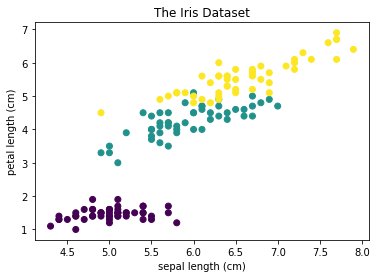

In [8]:
bunchobject = datasets.load_iris()
feature_index = [0,2]
my_data = bunchobject.data[:,feature_index]
''' the colours are according to the category'''
plt.scatter(my_data[:,0],my_data[:,1],c=bunchobject.target)
my_x = bunchobject.feature_names[0]
my_y = bunchobject.feature_names[2]
plt.xlabel(my_x)
plt.ylabel(my_y)
plt.title('The Iris Dataset')
plt.show()

# The k-Nearest Neighbours model (kNN)

So it would seem that if we had a new record to classify,  we can compare it against its neighbours and use the classification of its neighbours.

This is the intuition behind the k-nearest neighbours model.

<font color = 'blue'> The classification of an (unknown) record is determined by the majority of the classifications of its <font color = 'red'> k </font> nearest neighbours.</font>

## Let's begin. Put your code for get_metrics and <BR>normalize_minmax in these cells.

In [ ]:
import numpy as np

def normalize_minmax(data):
    data = np.transpose(data)
    result = []
    for col in data:
        col -= np.min(col)
        col /= np.max(col)
        result.append(col)
    return np.transpose(result)

In [ ]:
from sklearn.metrics import confusion_matrix

def get_metrics(actual_targets, predicted_targets, labels):
    dict_ = {}
    cm = confusion_matrix(actual_targets, predicted_targets, labels)
    dict_["confusion matrix"] = cm
    dict_["total records"] = len(actual_targets)
    dict_["accuracy"] = np.round(sum([cm[i][i] for i in range(len(cm))])/len(actual_targets),3)
    dict_["false positive rate"] = np.round(cm[0][1]/(cm[0][1] + cm[0][0]),3)
    dict_["sensitivity"] = np.round(cm[1][1]/(cm[1][0] + cm[1][1]),3)
#     print(cm)
    return dict_


#{'': array([[3, 1],
# [2, 2]]), 'total records': 8, 'accuracy': 0.625, 'sensitivity':
#0.5, 'false positive rate': 0.25}

# The Python Code

## Load the data and select the features you want to include 

For now the selection of features is an arbitrary decision

In [ ]:
bunchobject = datasets.load_breast_cancer()
feature_index = range(20)
data = bunchobject.data[:,feature_index]

## Normalize the data 

### Why normalize? The definition of "nearest" is by a distance measure 

### The default distance measure is the euclidean distance

For features $x$ and $y$, the "distance" $= \sqrt{ (x_1 - x_2)^2 + (y_1 - y_2)^2} $

Any feature that has a larger order of magnitude will have a larger effect on this value. 

Therefore we normalize to ensure that no single feature will dominate this calculation. 

- makes sense

In [ ]:
data = normalize_minmax(data)

## Split the data into the training and test set 

In [ ]:
size = 0.4
seed = 2752
target = bunchobject.target
data_train, data_test, target_train, target_test = train_test_split(data, 
                                                                    target, 
                                                                    test_size = size, 
                                                                    random_state = seed)

## Get an instance of the classifier and fit it to the training set

## The training set now becomes the nearest neighbours <BR> for the model to make predictions on the test set. 

## <font color = 'blue'> Your training set data IS the model</font>

## Arbitrarily select the value of <font color = 'red'> k </font> (for now)

In [ ]:
k = 3
clf =  neighbors.KNeighborsClassifier(k)
clf.fit(data_train, target_train)

## Make predictions on the test set 

In [ ]:
target_predicted = clf.predict(data_test)

## Generate the confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(target_test, target_predicted)

# Actually, divide your dataset into three parts

## We need a validation process to select the value of <font color ='red'> k </font>

Because you arbitrarily selected it just now. How do you know it produces the best accuracy? 

## The sets are now <ul> <li> training set</li><li><font color='red'>validation set</font></li> <li>test set </li></ul>
### Make predictions on the <font color = 'red'>validation set</font> for different values of <font color = 'red'>k </font>. 

### Choose the <font color = 'red'> k </font> that gives you the best accuracy (or your chosen metric)

### With this value of <font color = 'red'>k</font>, you have your final model. 

### Use the <font color = 'blue'>test set</font> to get an idea of how your model will perform on data that it has not seen. 

In [ ]:
from sklearn.model_selection import train_test_split 
from sklearn import neighbors, datasets
from sklearn.metrics import confusion_matrix
import numpy as np

# place all other function definitions you need here
#

def knn_classifier(bunchobject, feature_list, size, seed, k): 
    '''extract and normalize data'''
    bunchobject = datasets.load_breast_cancer()
    data = bunchobject.data[:,feature_list]
    data = normalize_minmax(data)
    
    target = bunchobject.target
    data_train, data_test, target_train, target_test = train_test_split(
        data, target, test_size = size, random_state = seed)
    
    clf =  neighbors.KNeighborsClassifier(k)
    clf.fit(data_train, target_train)
    
    target_predicted = clf.predict(data_test)
#     confusion_matrix_ = confusion_matrix(target_test, target_predicted)
    
    
    result = get_metrics(target_test, target_predicted, [0,1])
#     results = {}
#     results['confusion matrix'] = confusion_matrix_
#     results['total records'] = np.sum(np.sum(confusion_matrix_))
#     results['accuracy'] = np.round((confusion_matrix_[0,0] + confusion_matrix_[1,1]) / results['total records'],3)
#     results['sensitivity'] = np.round((confusion_matrix_[1,0] + confusion_matrix_[1,1]) / results['total records'],3)
#     results['false positive rate'] = np.round(confusion_matrix_[0,0] / (confusion_matrix_[1,0] + confusion_matrix_[1,1]),3)
    return result

In [ ]:
features = range(20)
results = knn_classifier(bunchobject, features, 0.40, 2752, 3)
print(results)

In [ ]:
{'confusion matrix': array([[ 73, 9],
 [ 5, 141]]), 'total records': 228, 'accuracy': 0.939,
'sensitivity': 0.966, 'false positive rate': 0.11}

In [ ]:
def knn_classifier(bunchobject, feature_list, size, seed , k ): 
    '''extract and normalize data'''
    data_raw = bunchobject.data[:, feature_list]
    target = bunchobject.target
    data = normalize_minmax(data_raw)
    
    '''build training and test sets'''
    data_train, data_test, target_train, target_test = train_test_split(
        data,target,test_size = size, random_state = seed)
    
    '''perform classification'''
    clf = neighbors.KNeighborsClassifier(n_neighbors = k)
    clf.fit(data_train, target_train)
    target_pred = clf.predict(data_test)
    
    result = get_metrics(target_test, target_pred, [0,1])
    return result

In [4]:
from sklearn.model_selection import train_test_split 
from sklearn import neighbors, datasets
from sklearn.metrics import confusion_matrix



def normalize_minmax(data):
    data = np.transpose(data)
    result = []
    for col in data:
        col -= np.min(col)
        col /= np.max(col)
        result.append(col)
    return np.transpose(result)


from sklearn.metrics import confusion_matrix

def get_metrics(actual_targets, predicted_targets, labels):
    dict_ = {}
    cm = confusion_matrix(actual_targets, predicted_targets, labels)
    dict_["confusion matrix"] = cm
    dict_["total records"] = len(actual_targets)
    dict_["accuracy"] = np.round(sum([cm[i][i] for i in range(len(cm))])/len(actual_targets),3)
    dict_["false positive rate"] = np.round(cm[0][1]/(cm[0][1] + cm[0][0]),3)
    dict_["sensitivity"] = np.round(cm[1][1]/(cm[1][0] + cm[1][1]),3)
    return dict_


def knn_classifier(bunchobject, feature_list, size, seed, k): 
    '''extract and normalize data'''
    bunchobject = datasets.load_breast_cancer()
    data = bunchobject.data[:,feature_list]
    data = normalize_minmax(data)
    
    target = bunchobject.target
    data_train, data_test, target_train, target_test = train_test_split(
        data, target, test_size = size, random_state = seed)
    
    clf =  neighbors.KNeighborsClassifier(k)
    clf.fit(data_train, target_train)
    
    target_predicted = clf.predict(data_test)    
    
    result = get_metrics(target_test, target_predicted, [0,1])
    return result


import numpy as np

# include all the necessary function definitions here
   
def knn_classifier_full(bunchobject, feature_list, size, seed):
    bunchobject = datasets.load_breast_cancer()
    data = bunchobject.data[:,feature_list]
    data = normalize_minmax(data)
    
    target = bunchobject.target
    data_train, data_test, target_train, target_test = train_test_split(
        data, target, test_size = size, random_state = seed)
    
    data_test1, data_test2, target_test1, target_test2 = train_test_split(
        data_test, target_test, test_size = 0.5, random_state = seed)
#     print(len(target_test))
    
    k_acc = []
    k_results = []
    
    for k in range(1,20):
        clf =  neighbors.KNeighborsClassifier(k)
        clf.fit(data_train, target_train)
#         print(target_test1)
        target_predicted = clf.predict(data_test1)
#         print(target_predicted)
        result = get_metrics(target_test1, target_predicted, [0,1])
        k_acc.append(result['accuracy'])
        k_results.append(result)
        
    index = np.argmax(k_acc)
    k_test = index + 1
    
    clf =  neighbors.KNeighborsClassifier(k_test)
    clf.fit(data_train, target_train)
    target_predicted = clf.predict(data_test2)
    test_result = get_metrics(target_test2, target_predicted, [0,1])
    
    dict_ = {}
    dict_['best k'] = k_test
    dict_['validation set'] = k_results[index]
    dict_['test set'] = test_result
    return dict_

In [5]:
bunchobject = datasets.load_breast_cancer()
feature_index = range(20)
data = bunchobject.data[:,feature_index]

features = range(20) #select features in cols 0 to 19
results = knn_classifier_full(bunchobject, features, 0.40, 2752)
print(results)

228
{'best k': 4, 'validation set': {'confusion matrix': array([[39,  2],
       [ 2, 71]]), 'total records': 114, 'accuracy': 0.965, 'false positive rate': 0.049, 'sensitivity': 0.973}, 'test set': {'confusion matrix': array([[40,  1],
       [ 4, 69]]), 'total records': 114, 'accuracy': 0.956, 'false positive rate': 0.024, 'sensitivity': 0.945}}


In [ ]:
{'best k': 4, 'validation set': {'confusion matrix': array([[39, 2],
 [ 2, 71]]), 'total records': 114, 'accuracy': 0.965, 'sensitivity':
0.973, 'false positive rate': 0.049}, 'test set': {'confusion matrix':
array([[40, 1],
 [ 4, 69]]), 'total records': 114, 'accuracy': 0.956, 'sensitivity':
0.945, 'false positive rate': 0.024}}